# Pandas II: Data Wrangling
Agenda today:
- Reshaping and Structuring Data
    - __set_index()__
    - __unstack()__
    - __stack()__
    - __pivot()__/__pivot_table__
- Manipulate & Joining Multiple Tables
    - __merge()__
    - __concat()__

*some image credit to [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)*

____
## 1. Reshaping DataFrames

### 1.1 Advanced Indexing
- __set_index()__: <br>
Set the index of a dataframes
- __reset_index()__ : <br>
reset_index method will transform our Series into a DataFrame and move the indices into their own column. Generally, you'll always see a groupby statement followed by reset_index

In [122]:
import numpy as np
import pandas as pd

In [123]:
# create some data 
grades_dict = {"student_names":['Nan','Dan','Jason','Nan','Luke','Dan','Elena','Nan','Elena','Luke'],
         "project":["proj_1","proj_1","proj_1","proj_2","proj_1","proj_2","proj_1","proj_3","proj_3","proj_3"],
         "grades":np.random.randint(80,100,10)}

In [124]:
grades_dict

{'student_names': ['Nan',
  'Dan',
  'Jason',
  'Nan',
  'Luke',
  'Dan',
  'Elena',
  'Nan',
  'Elena',
  'Luke'],
 'project': ['proj_1',
  'proj_1',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_2',
  'proj_1',
  'proj_3',
  'proj_3',
  'proj_3'],
 'grades': array([80, 83, 80, 94, 99, 97, 89, 80, 95, 86])}

In [127]:
grades = pd.DataFrame(grades_dict)
grades

,student_names,project,grades
0,Nan,proj_1,80
1,Dan,proj_1,83
2,Jason,proj_1,80
3,Nan,proj_2,94
4,Luke,proj_1,99
5,Dan,proj_2,97
6,Elena,proj_1,89
7,Nan,proj_3,80
8,Elena,proj_3,95
9,Luke,proj_3,86


In [129]:
grades.sort_values(by = 'student_names', inplace = True)
grades

,student_names,project,grades
1,Dan,proj_1,83
5,Dan,proj_2,97
6,Elena,proj_1,89
8,Elena,proj_3,95
2,Jason,proj_1,80
4,Luke,proj_1,99
9,Luke,proj_3,86
0,Nan,proj_1,80
3,Nan,proj_2,94
7,Nan,proj_3,80


In [130]:
# now we have created a multilevel indexed dataframe, indexed by both project and student_names
grades_multi = grades.set_index(['student_names','project'])
grades_multi

grades
student_names project        
Dan           proj_1       83
              proj_2       97
Elena         proj_1       89
              proj_3       95
Jason         proj_1       80
Luke          proj_1       99
              proj_3       86
Nan           proj_1       80
              proj_2       94
              proj_3       80

In [131]:
# examine the rows and columns of this new df
grades_multi.index

MultiIndex(levels=[['Dan', 'Elena', 'Jason', 'Luke', 'Nan'], ['proj_1', 'proj_2', 'proj_3']],
           labels=[[0, 0, 1, 1, 2, 3, 3, 4, 4, 4], [0, 1, 0, 2, 0, 0, 2, 0, 1, 2]],
           names=['student_names', 'project'])

In [132]:
# subsetting from this multilevel df 
# I want Dan's grades
grades_multi.loc['Dan',:]

,grades
project,
proj_1,83
proj_2,97


In [134]:
# only want Dan's first grade --> passing the row index as a TUPLE
grades_multi.loc[('Dan','proj_1'),:]

grades    83
Name: (Dan, proj_1), dtype: int64

In [135]:
# want Nan's first 2 grades 
grades_multi.loc[('Nan',['proj_1','proj_2']),:]

grades
student_names project        
Nan           proj_1       80
              proj_2       94

In [136]:
# want all of the grades for project 1 for all students
grades_multi.loc[(slice(None),'proj_1'),:]

,,grades
student_names,project,
Dan,proj_1,83
Elena,proj_1,89
Jason,proj_1,80
Luke,proj_1,99
Nan,proj_1,80


____
### 1.2 Reshaping the dataframe - Pivot, stacking and unstacking 
__pivot_table( )__:<br>
Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.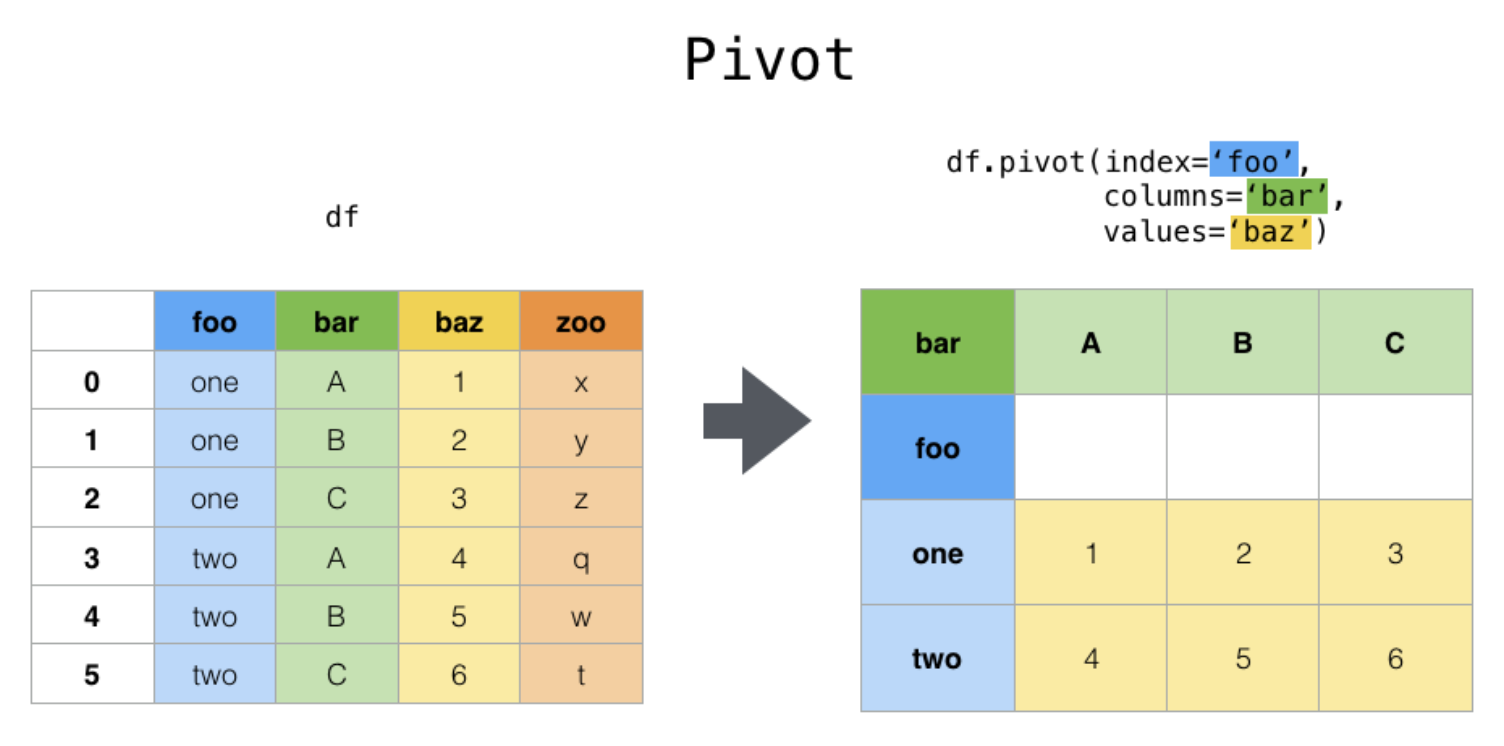

In [137]:
# let's go back to the original grades dataset
grades

,student_names,project,grades
1,Dan,proj_1,83
5,Dan,proj_2,97
6,Elena,proj_1,89
8,Elena,proj_3,95
2,Jason,proj_1,80
4,Luke,proj_1,99
9,Luke,proj_3,86
0,Nan,proj_1,80
3,Nan,proj_2,94
7,Nan,proj_3,80


In [41]:
# what if I want to changes the structure of the dataframe?
grades_pivoted = pd.pivot_table(grades, values='grades', index='student_names', columns='project')
grades_pivoted
# why are there some NaN's here?

project,proj_1,proj_2,proj_3
student_names,,,
Dan,80.0,98.0,NaN
Elena,93.0,NaN,86.0
Jason,88.0,NaN,NaN
Luke,86.0,NaN,87.0
Nan,80.0,89.0,85.0


In [42]:
grades_pivoted.index

Index(['Dan', 'Elena', 'Jason', 'Luke', 'Nan'], dtype='object', name='student_names')

In [43]:
grades_pivoted.columns

Index(['proj_1', 'proj_2', 'proj_3'], dtype='object', name='project')

____
__unstack()__:<br>
Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

The level involved will automatically get sorted.
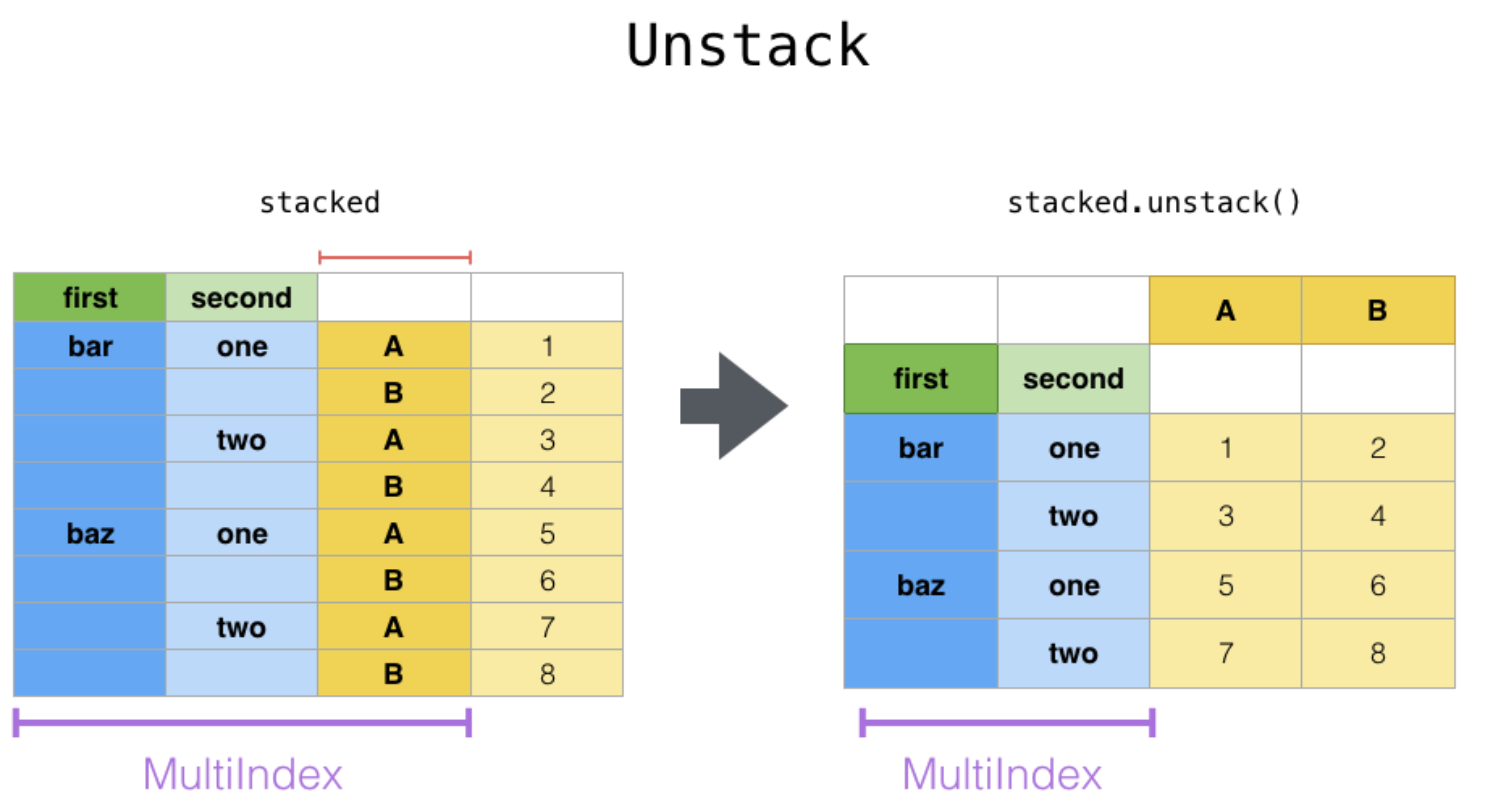

In [138]:
grades

,student_names,project,grades
1,Dan,proj_1,83
5,Dan,proj_2,97
6,Elena,proj_1,89
8,Elena,proj_3,95
2,Jason,proj_1,80
4,Luke,proj_1,99
9,Luke,proj_3,86
0,Nan,proj_1,80
3,Nan,proj_2,94
7,Nan,proj_3,80


In [65]:
grade_ser = grades.groupby(['student_names','project']).grades.mean()
grade_ser

student_names  project
Dan            proj_1     80
               proj_2     98
Elena          proj_1     93
               proj_3     86
Jason          proj_1     88
Luke           proj_1     86
               proj_3     87
Nan            proj_1     80
               proj_2     89
               proj_3     85
Name: grades, dtype: int64

In [143]:
grade_ser.unstack()
### this is the same as pivoted table above. In fact, unstacking is a special case of pivot table

project,proj_1,proj_2,proj_3
student_names,,,
Dan,80.0,98.0,NaN
Elena,93.0,NaN,86.0
Jason,88.0,NaN,NaN
Luke,86.0,NaN,87.0
Nan,80.0,89.0,85.0


____
__stack()__:<br> “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.
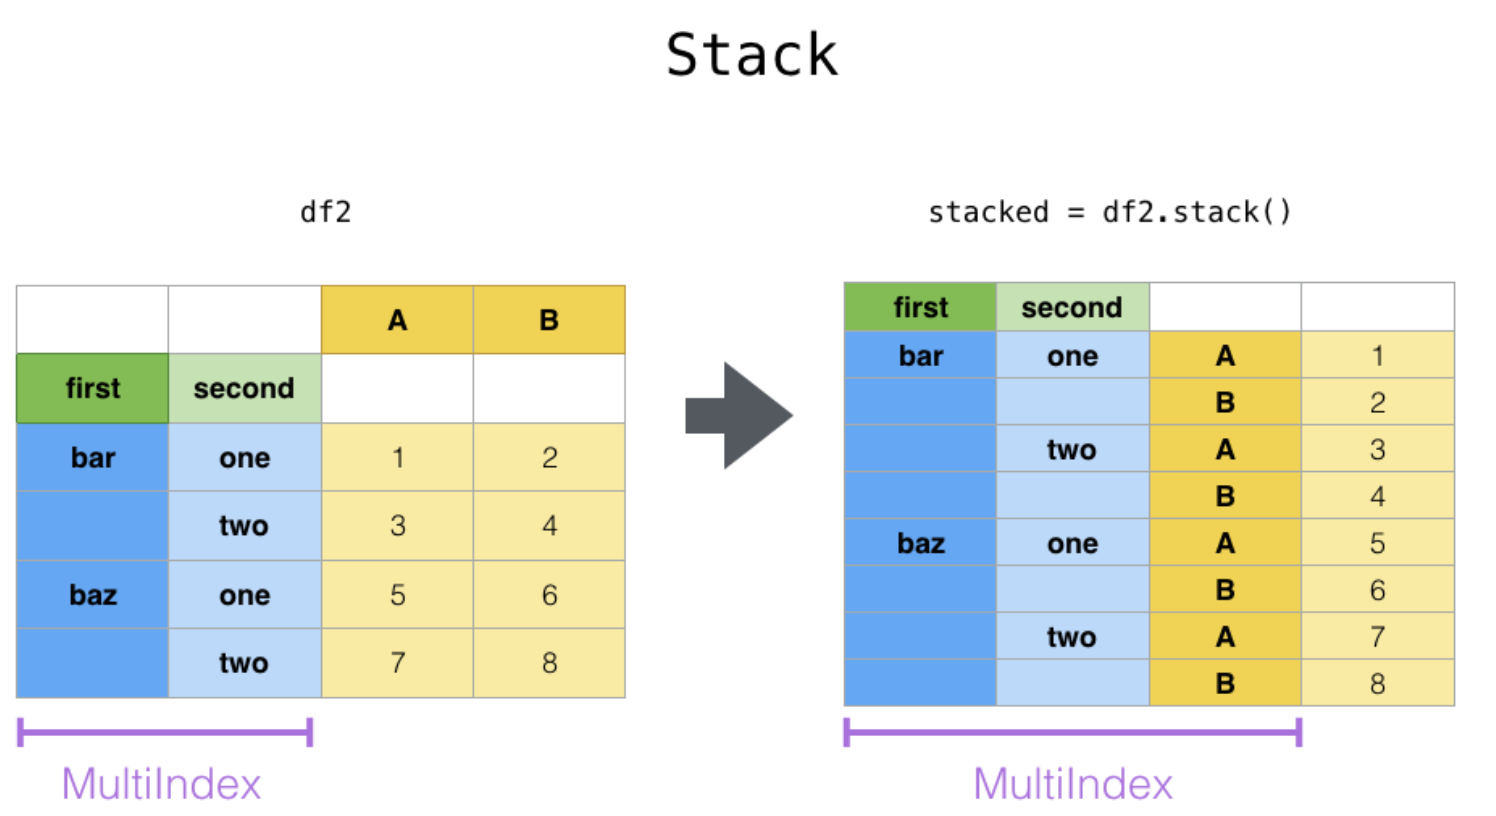

In [144]:
grades

,student_names,project,grades
1,Dan,proj_1,83
5,Dan,proj_2,97
6,Elena,proj_1,89
8,Elena,proj_3,95
2,Jason,proj_1,80
4,Luke,proj_1,99
9,Luke,proj_3,86
0,Nan,proj_1,80
3,Nan,proj_2,94
7,Nan,proj_3,80


In [145]:
grades_pivoted

project,proj_1,proj_2,proj_3
student_names,,,
Dan,80.0,98.0,NaN
Elena,93.0,NaN,86.0
Jason,88.0,NaN,NaN
Luke,86.0,NaN,87.0
Nan,80.0,89.0,85.0


In [150]:
# when you stack the dataframe above, you're putting them back in the pd series format they originally were in 
grades_pivoted.stack()

student_names  project
Dan            proj_1     80.0
               proj_2     98.0
Elena          proj_1     93.0
               proj_3     86.0
Jason          proj_1     88.0
Luke           proj_1     86.0
               proj_3     87.0
Nan            proj_1     80.0
               proj_2     89.0
               proj_3     85.0
dtype: float64

____
## 2. Working with Multiple DataFrames
### 2.1 Concatenating dataframes

In [77]:
# create a few more df's
grades_1 = grades
grades_1

,student_names,project,grades
1,Dan,proj_1,80
5,Dan,proj_2,98
6,Elena,proj_1,93
8,Elena,proj_3,86
2,Jason,proj_1,88
4,Luke,proj_1,86
9,Luke,proj_3,87
0,Nan,proj_1,80
3,Nan,proj_2,89
7,Nan,proj_3,85


In [80]:
grades_2 = pd.DataFrame({"student_names":["Alex","Miguel","Abdul","Karen","Miguel","Abdul","Karen","Alex","Caroline"],
                                "project":["proj_1","proj_1","proj_1","proj_1","proj_2","proj_2","proj_2","proj_2","proj_1"],
                                "grades":np.random.randint(80,100,9)})
grades_2

,student_names,project,grades
0,Alex,proj_1,88
1,Miguel,proj_1,94
2,Abdul,proj_1,85
3,Karen,proj_1,91
4,Miguel,proj_2,92
5,Abdul,proj_2,86
6,Karen,proj_2,86
7,Alex,proj_2,90
8,Caroline,proj_1,97


In [100]:
# if we need to vertically bind them together, we use concat
grades_12_concat = pd.concat([grades_1,grades_2])
grades_12_concat.sort_values(by = 'student_names',inplace =True)
grades_12_concat

,student_names,project,grades
5,Abdul,proj_2,86
2,Abdul,proj_1,85
0,Alex,proj_1,88
7,Alex,proj_2,90
8,Caroline,proj_1,97
1,Dan,proj_1,80
5,Dan,proj_2,98
8,Elena,proj_3,86
6,Elena,proj_1,93
2,Jason,proj_1,88


____
## The Adults Dataset

In [180]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header=None)
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adults.columns = columns
adults = adults.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
adults['income_binary'] = adults.income.apply(lambda x: 1 if x == '>50K' else 0)

In [185]:
# grouping by race 
grouped_by_race = adults.groupby(['race']).income_binary.value_counts().unstack()
grouped_by_race
# allows us to calculate the proportion of people who earned more than 50k by race

income_binary,0,1
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


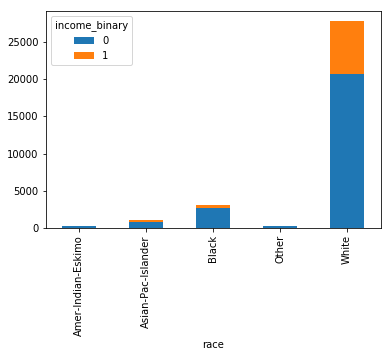

In [186]:
grouped_by_race.plot(kind = 'bar', stacked = True)

In [187]:
# calculating proportion
grouped_by_race['total'] = adults.groupby(['race']).income_binary.count()
grouped_by_race['percentage'] = grouped_by_race[1]/grouped_by_race.total
grouped_by_race

income_binary,0,1,total,percentage
race,,,,
Amer-Indian-Eskimo,275,36,311,0.115756
Asian-Pac-Islander,763,276,1039,0.265640
Black,2737,387,3124,0.123880
Other,246,25,271,0.092251
White,20699,7117,27816,0.255860


In [190]:
grouped_by_race_and_sex = adults.groupby(['race','sex']).income_binary.value_counts()
grouped_by_race_and_sex

race                sex     income_binary
Amer-Indian-Eskimo  Female  0                  107
                            1                   12
                    Male    0                  168
                            1                   24
Asian-Pac-Islander  Female  0                  303
                            1                   43
                    Male    0                  460
                            1                  233
Black               Female  0                 1465
                            1                   90
                    Male    0                 1272
                            1                  297
Other               Female  0                  103
                            1                    6
                    Male    0                  143
                            1                   19
White               Female  0                 7614
                            1                 1028
                    Male    0           

In [ ]:
# what would happen if we unstack this?

____
### 1.2 Merging 
__merge()__
Merging is a more complicated operation in pandas, but allows a lot of flexibility in terms of the method of joining dfs. The .merge method looks for columns that are common between two DataFrames and then looks for rows where those column's values are the same. It then combines the matching rows into a single row in a new table.

In [95]:
student_quiz_1 = pd.DataFrame({"student_names":["Alex","Miguel","Abdul","Karen","Miguel","Abdul","Karen","Alex","Caroline"],
                                "project":["proj_1","proj_1","proj_1","proj_1","proj_2","proj_2","proj_2","proj_2","proj_1"],
                                "quiz_score":np.random.randint(0,10,9)})

In [97]:
student_quiz_1

,student_names,project,quiz_score
0,Alex,proj_1,5
1,Miguel,proj_1,1
2,Abdul,proj_1,5
3,Karen,proj_1,9
4,Miguel,proj_2,6
5,Abdul,proj_2,7
6,Karen,proj_2,1
7,Alex,proj_2,7
8,Caroline,proj_1,0


In [98]:
merged_quiz_and_grades = student_quiz_1.merge(grades_2)
merged_quiz_and_grades

,student_names,project,quiz_score,grades
0,Alex,proj_1,5,88
1,Miguel,proj_1,1,94
2,Abdul,proj_1,5,85
3,Karen,proj_1,9,91
4,Miguel,proj_2,6,92
5,Abdul,proj_2,7,86
6,Karen,proj_2,1,86
7,Alex,proj_2,7,90
8,Caroline,proj_1,0,97


However, if the column names don't match, we can either use the rename method to rename the column, or we can specify which columns we want to join on - We could use the keywords left_on and right_on to specify which columns we want to perform the merge on. 
____
__types of merges__: <br>
- inner merge: merging on only the overlaps
- outer merge: merging on everything
- left merge: merging on entries in the left df
- right merge: merge on entries on the right df
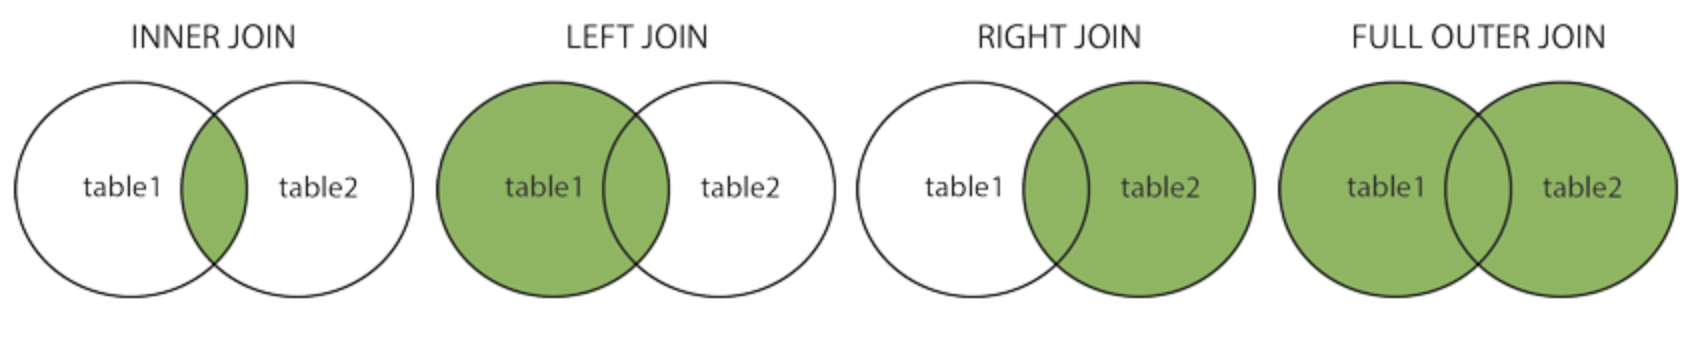

In [115]:
#### another example 
small_quiz = pd.DataFrame({"students":["Rene","Kevin","Judah"],
                          "projects":[1,2,1],
                          "grades":np.random.randint(80,100,3)})
small_grades = pd.DataFrame({"students":["Rima","Kevin","Rene"],
                            "quiz_score":np.random.randint(0,10,3)})

In [116]:
small_grades

,students,quiz_score
0,Rima,3
1,Kevin,6
2,Rene,4


In [117]:
small_quiz

,students,projects,grades
0,Rene,1,98
1,Kevin,2,98
2,Judah,1,80


In [118]:
small_outer_merge = pd.merge(small_grades,small_quiz,how = 'outer')
small_outer_merge

,students,quiz_score,projects,grades
0,Rima,3.0,NaN,NaN
1,Kevin,6.0,2.0,98.0
2,Rene,4.0,1.0,98.0
3,Judah,NaN,1.0,80.0


In [119]:
small_inner_merge = pd.merge(small_grades,small_quiz, how = 'inner')
small_inner_merge

,students,quiz_score,projects,grades
0,Kevin,6,2,98
1,Rene,4,1,98


In [120]:
small_left_merge = pd.merge(small_grades,small_quiz,how = 'left')
small_left_merge

,students,quiz_score,projects,grades
0,Rima,3,NaN,NaN
1,Kevin,6,2.0,98.0
2,Rene,4,1.0,98.0


In [121]:
small_right_merge = pd.merge(small_grades,small_quiz,how = 'right')
small_right_merge

,students,quiz_score,projects,grades
0,Kevin,6.0,2,98
1,Rene,4.0,1,98
2,Judah,NaN,1,80
